In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:

path='/content/drive/MyDrive/Skin-Cancer-Classification-80-10-10 split/hmnist_28_28_RGB.csv'


In [ ]:

df=pd.read_csv(path)


In [ ]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [ ]:
fractions = np.array([0.8, 0.1, 0.1])
df = df.sample(frac=1)  # Shuffle the DataFrame

train_set, validation_set, test_set = np.array_split(
    df, (fractions.cumsum() * len(df)).astype(int)[:-1]
)

In [ ]:
print(len(train_set))

8012


In [ ]:
print(len(test_set))

1002


In [ ]:
df.label.unique()

array([4, 0, 1, 2, 5, 6, 3])

In [ ]:

classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [ ]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)


In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


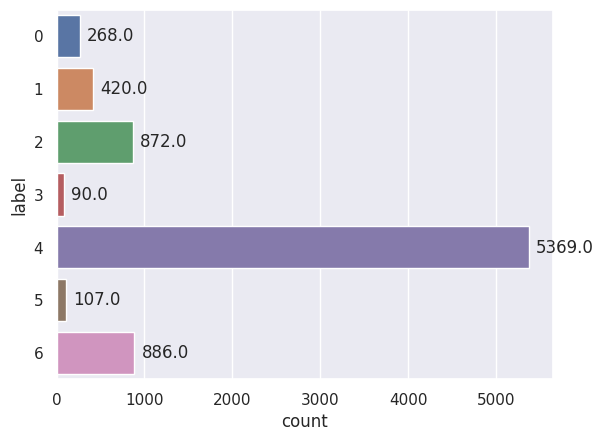

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming y_train is a Series or a list with labels
sns.set(style="darkgrid")  # Set the style for better visibility

# Create the count plot with annotations
ax = sns.countplot(y=y_train)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()  # Display the plot

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

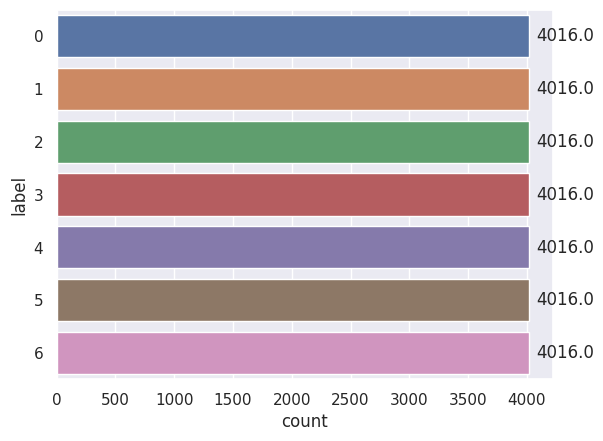

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming y_train is a Series or a list with labels
sns.set(style="darkgrid")  # Set the style for better visibility

# Create the count plot with annotations
ax = sns.countplot(y=y_train)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()  # Display the plot

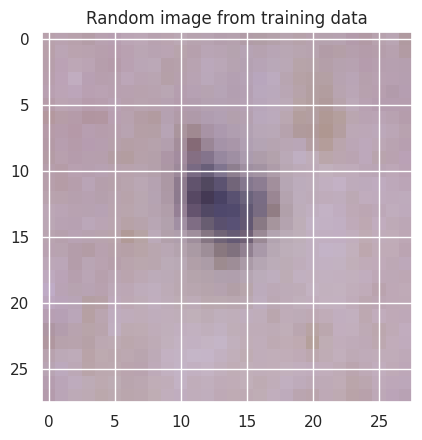

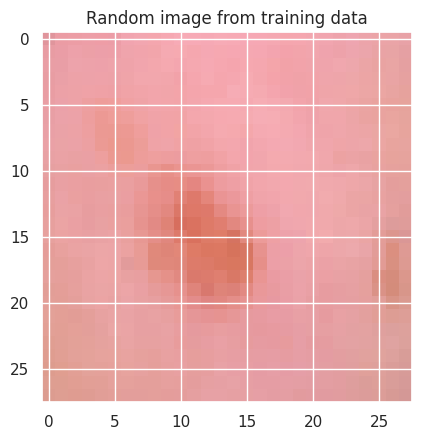

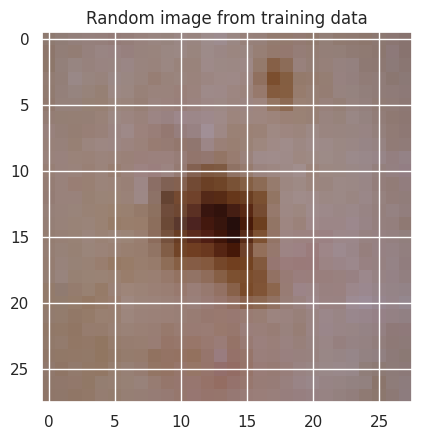

In [ ]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
import tensorflow as tf

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

# Load the ResNet50 model (include_top=False means excluding the fully connected layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential()

# Add the pre-trained ResNet50 base model
model.add(base_model)

# Flatten the output of the base model
model.add(Flatten())

# Adding own dense layers on top
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 batch_normalization_8 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Res.h5',

    mode='max',
    verbose=1,
    save_best_only=True
)




In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array

# Assuming x_train and y_train are your features and labels

# First, split the data into training and temporary sets (80% training, 20% temporary)
x_train_temp, x_temp, y_train_temp, y_temp = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Then, split the temporary set into validation and test sets (50% each)
x_validation, x_test, y_validation, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42
)

# Resize images to (32, 32) for training set
x_train_resized = np.array([img_to_array(array_to_img(x, scale=False).resize((32, 32))) for x in x_train_temp])

# Resize images to (32, 32) for validation set
x_validation_resized = np.array([img_to_array(array_to_img(x, scale=False).resize((32, 32))) for x in x_validation])

# Resize images to (32, 32) for test set
x_test_resized = np.array([img_to_array(array_to_img(x, scale=False).resize((32, 32))) for x in x_test])

# Continue with the model compilation and training using x_train_resized and y_train_temp
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(x_train_resized,
                    y_train_temp,
                    validation_data=(x_validation_resized, y_validation),
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[callback])

# Evaluate the model on the resized test set
loss, acc = model.evaluate(x_test_resized, y_test, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')


Epoch 1/50
235/235 [==============================] - ETA: 0s - loss: 1.2117 - accuracy: 0.5540
Epoch 1: val_loss improved from -inf to 0.77789, saving model to /content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Res.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


235/235 [==============================] - 23s 57ms/step - loss: 1.2117 - accuracy: 0.5540 - val_loss: 0.7779 - val_accuracy: 0.7286
Epoch 2/50
235/235 [==============================] - ETA: 0s - loss: 0.7775 - accuracy: 0.7147
Epoch 2: val_loss did not improve from 0.77789
235/235 [==============================] - 5s 21ms/step - loss: 0.7775 - accuracy: 0.7147 - val_loss: 0.5224 - val_accuracy: 0.8201
Epoch 3/50
235/235 [==============================] - ETA: 0s - loss: 0.6077 - accuracy: 0.7819
Epoch 3: val_loss did not improve from 0.77789
235/235 [==============================] - 5s 23ms/step - loss: 0.6077 - accuracy: 0.7819 - val_loss: 0.4412 - val_accuracy: 0.8419
Epoch 4/50
234/235 [============================>.] - ETA: 0s - loss: 0.4995 - accuracy: 0.8180
Epoch 4: val_loss did not improve from 0.77789
235/235 [==============================] - 6s 25ms/step - loss: 0.4991 - accuracy: 0.8181 - val_loss: 0.3477 - val_accuracy: 0.8805
Epoch 5/50
235/235 [======================

In [ ]:
import pickle
with open('/content/drive/My Drive/Colab Notebooks/Skin Cancer/history_Res.pickle', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer =optimizer,
              metrics = ['accuracy'])

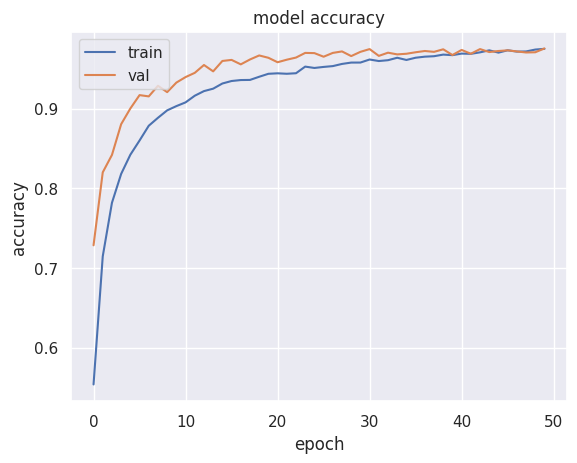

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#Assuming you have saved the history during training, load it here


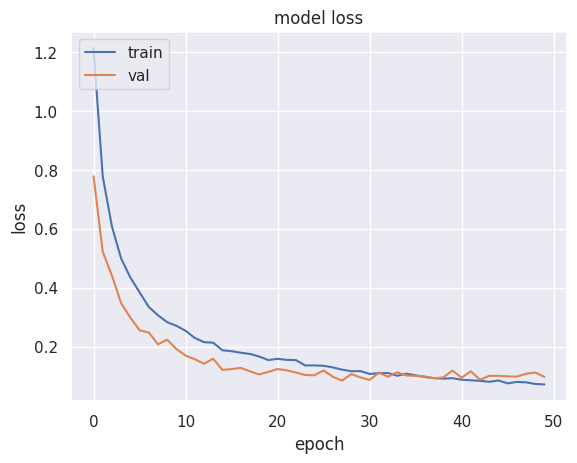

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('/content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Res.h5')

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from sklearn.metrics import confusion_matrix, classification_report
import PIL
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array

# Resize images to (32, 32) for ResNet50
x_test_pixels = np.array(x_test).reshape(-1, 28, 28, 3)
x_test_resized = np.array([img_to_array(array_to_img(x, scale=False).resize((32, 32))) for x in x_test_pixels])

# Evaluate the model
loss, acc = model.evaluate(x_test_resized, y_test, verbose=2)


# Resize an example image for prediction
image = PIL.Image.open('/content/drive/MyDrive/Skin-Cancer-Classification-80-10-10 split/1234214.jpg')
image = image.resize((32, 32))
img = np.array(image).reshape(-1, 32, 32, 3)

# Make a prediction
result = model.predict(img)
print(result[0])

# Convert the result to a list
result = result.tolist()

# Find the class with the maximum probability
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])

# Resize the test set for confusion matrix and classification report
x_test_resized = np.array([img_to_array(array_to_img(x, scale=False).resize((32, 32))) for x in x_test_pixels])

# Make predictions on the resized test set
y_pred = np.argmax(model.predict(x_test_resized), axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


118/118 - 3s - loss: 0.7788 - accuracy: 0.7342 - 3s/epoch - 25ms/step
1/1 [==============================] - 1s 1s/step
[0.04053634 0.1611184  0.3834412  0.02336449 0.06003943 0.21748698
 0.11401312]
('bkl', 'benign keratosis-like lesions')
118/118 [==============================] - 3s 13ms/step
Confusion Matrix:
[[438  51  18   3  10   1  32]
 [ 72 368  22   5   8  15  28]
 [ 52  46 245   7  66  25 114]
 [  0  24   0 496   6  16   0]
 [ 10  14  21   1 371  47  73]
 [  0   0   0   0   4 522   0]
 [ 62  16  41   0  77  12 320]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       553
           1       0.71      0.71      0.71       518
           2       0.71      0.44      0.54       555
           3       0.97      0.92      0.94       542
           4       0.68      0.69      0.69       537
           5       0.82      0.99      0.90       526
           6       0.56      0.61      0.58       528

    accur

Mounted at /content/drive/


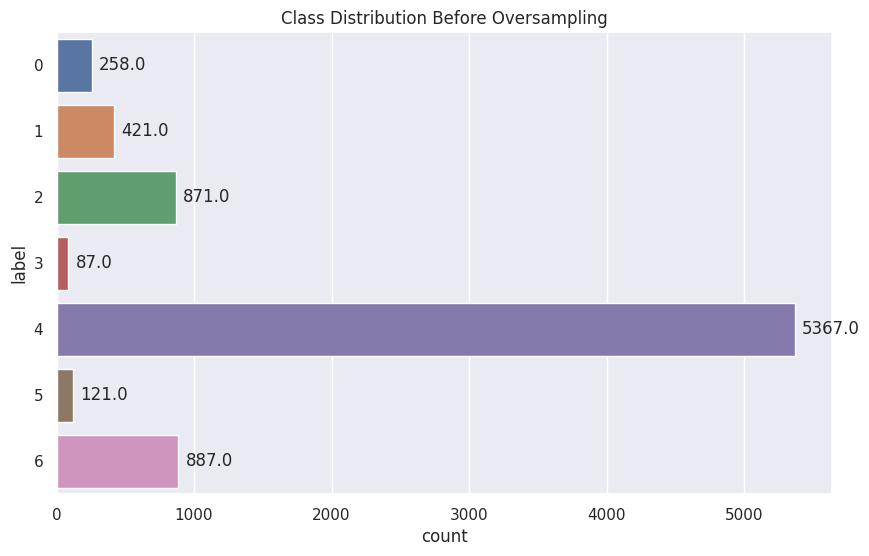

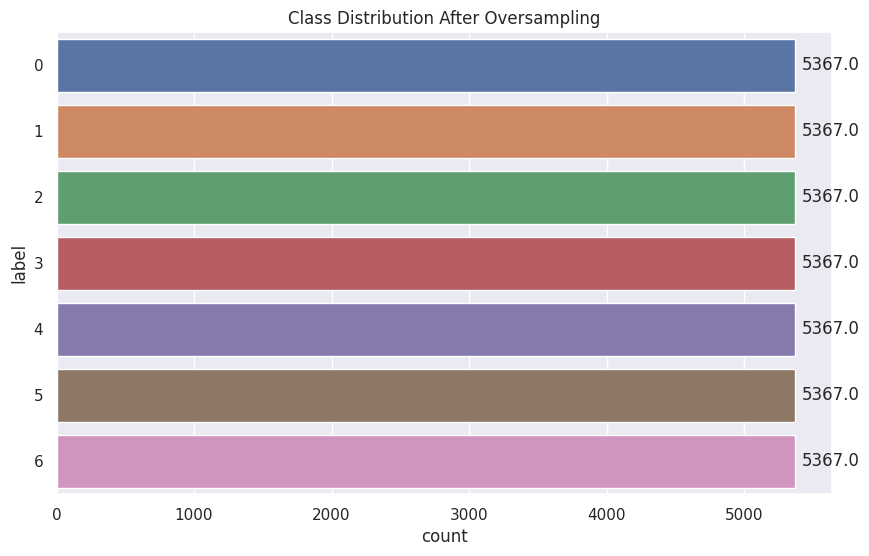

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


235/235 [==============================] - 20s 36ms/step - loss: 1.2411 - accuracy: 0.5425 - val_loss: 0.7711 - val_accuracy: 0.7099
Epoch 2/50
234/235 [============================>.] - ETA: 0s - loss: 0.8515 - accuracy: 0.6859
Epoch 2: val_loss did not improve from 0.77109
235/235 [==============================] - 5s 22ms/step - loss: 0.8516 - accuracy: 0.6859 - val_loss: 0.6276 - val_accuracy: 0.7663
Epoch 3/50
235/235 [==============================] - ETA: 0s - loss: 0.7089 - accuracy: 0.7388
Epoch 3: val_loss did not improve from 0.77109
235/235 [==============================] - 5s 20ms/step - loss: 0.7089 - accuracy: 0.7388 - val_loss: 0.5293 - val_accuracy: 0.8052
Epoch 4/50
234/235 [============================>.] - ETA: 0s - loss: 0.6362 - accuracy: 0.7687
Epoch 4: val_loss did not improve from 0.77109
235/235 [==============================] - 5s 21ms/step - loss: 0.6357 - accuracy: 0.7690 - val_loss: 0.5137 - val_accuracy: 0.8147
Epoch 5/50
234/235 [======================

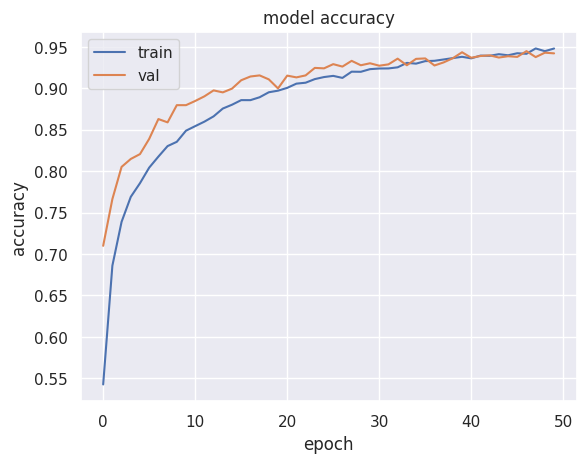

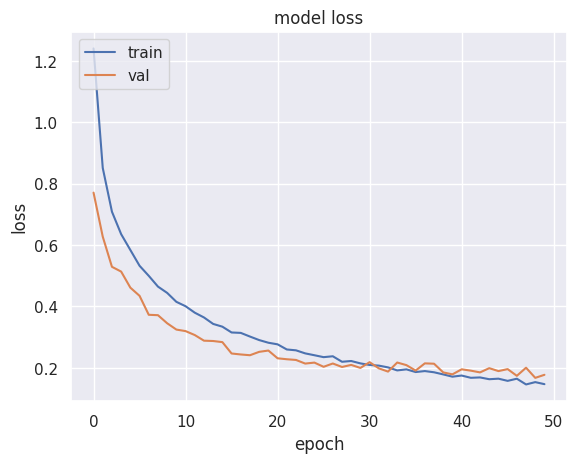

118/118 - 1s - loss: 0.8041 - accuracy: 0.7056 - 1s/epoch - 10ms/step
Test Loss: 0.8040828108787537, Test Accuracy: 0.7056161761283875
118/118 [==============================] - 2s 10ms/step
Confusion Matrix:
[[446  50   7   5   5   2  20]
 [151 313  12  18  11  17  15]
 [ 86  64 206  14  66  12  95]
 [ 37  27   1 438   2   0   3]
 [ 10  14  27  15 386  12  89]
 [  2   9   2   1   9 513   2]
 [ 50  10  38  15  64  17 349]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.83      0.68       535
           1       0.64      0.58      0.61       537
           2       0.70      0.38      0.49       543
           3       0.87      0.86      0.86       508
           4       0.71      0.70      0.70       553
           5       0.90      0.95      0.92       538
           6       0.61      0.64      0.63       543

    accuracy                           0.71      3757
   macro avg       0.71      0.71      0.70      3757
weighte

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from sklearn.metrics import confusion_matrix, classification_report
import PIL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE  # Import SMOTE
import matplotlib.pyplot as plt  # Import pyplot explicitly
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount("/content/drive/")

# Specify the paths for train, validation, and test sets
train_path = '/content/drive/MyDrive/DL/train_data.csv'
valid_path = '/content/drive/MyDrive/DL/valid_data.csv'
test_path = '/content/drive/MyDrive/DL/test_data.csv'

# Load datasets
train_df = pd.read_csv(train_path)
valid_df = pd.read_csv(valid_path)
test_df = pd.read_csv(test_path)

# Define classes
classes = {
    0: ('akiec', 'actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'basal cell carcinoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    3: ('df', 'dermatofibroma'),
    4: ('nv', 'melanocytic nevi'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),
    6: ('mel', 'melanoma'),
}

# Extract labels
y_train = train_df['label']
y_valid = valid_df['label']
y_test = test_df['label']

# Extract and reshape features
x_train = np.array(train_df.iloc[:, 1:]).reshape(-1, 28, 28, 3)
x_valid = np.array(valid_df.iloc[:, 1:]).reshape(-1, 28, 28, 3)
x_test = np.array(test_df.iloc[:, 1:]).reshape(-1, 28, 28, 3)

# Resize images
x_train_resized = np.array([img_to_array(array_to_img(x, scale=False).resize((32, 32))) for x in x_train])
x_valid_resized = np.array([img_to_array(array_to_img(x, scale=False).resize((32, 32))) for x in x_valid])
x_test_resized = np.array([img_to_array(array_to_img(x, scale=False).resize((32, 32))) for x in x_test])

# Import necessary libraries


# Plot class distribution before oversampling
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(y=y_train)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.title("Class Distribution Before Oversampling")
plt.show()

# Use SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_resized.reshape(-1, 32 * 32 * 3), y_train)

# Reshape the features back to 3D
x_train_resampled = x_train_resampled.reshape(-1, 32, 32, 3)

# Plot class distribution after oversampling
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax2 = sns.countplot(y=y_train_resampled)
for p in ax2.patches:
    ax2.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.title("Class Distribution After Oversampling")
plt.show()


# Load the ResNet50 model (include_top=False means excluding the fully connected layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential()

# Add the pre-trained ResNet50 base model
model.add(base_model)

# Flatten the output of the base model
model.add(Flatten())

# Adding own dense layers on top
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))

# Display the model summary
model.summary()

# Model Checkpoint callback
callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/Skin Cancer/best_model_Res_smote.h5',
    mode='max',
    verbose=1,
    save_best_only=True
)

# Model compilation
optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Train-validation-test split
x_train_temp, x_temp, y_train_temp, y_temp = train_test_split(
    x_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)

x_validation, x_test_resampled, y_validation, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42
)

# Model training
history = model.fit(x_train_temp, y_train_temp,
                    validation_data=(x_validation, y_validation),
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[callback])

# Evaluate the model on the resized test set
loss, acc = model.evaluate(x_test_resampled, y_test, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')

# Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Load best weights
model.load_weights('/content/drive/MyDrive/Colab Notebooks/Skin Cancer/best_model_Res_smote.h5')

# Evaluate on test set
loss, acc = model.evaluate(x_test_resampled, y_test, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')

# Make predictions on the test set
y_pred = np.argmax(model.predict(x_test_resampled), axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
